# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файлов

In [1381]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('games.csv')
display(data.head(30))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В исследовании мы будем анализировать таблицу игр. Сама таблица состоит из 11 столбцов и 16715 строк. Каждая строка описывает отдельную игру, а именно:
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В более чем половине столбцов встречаются пропуски, а именно в: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
В названиях всех колонок видны нарушения стиля.
Тип данных в столбцах `Year_of_Release` и `User_Score` не соответствует действительности. Стоит изменить тип данных в столбце `Critic_Score`, так как в нем не встречается данных с плавающей запятой.

**Вывод**

Чтобы приступать к анализу данных, нужно устранить проблемы:
- привести названия столбцов к нижнему регистру;
- изменить тип данных в `Year_of_Release`, `User_Score` и `Critic_Score`;
- обработать пропуски в `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`;

## Предобработка данных

### Стиль заголовков

Приведем все названия столбцов к нижнему регистру:

In [1382]:
data.columns = data.columns.str.lower()

Для того чтобы работать с данными было удобнее, приведем к нижнему регистру все срочные значения в нашей таблице:

In [1383]:
cols = ['name', 'platform', 'genre']

for col in cols:
    data[col] = data[col].str.lower()

### Замена типа данных

Тип данных столбца `user_score` - `object`. Из документации мы знаем, что в этом столбце сохраняются значения *tdb*, что значит *to be determined*. Прежде чем изменять тип данных в этом столбце, нам следует избавиться от срок: заменим *tdb* на `NaN`:

In [1384]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

Теперь мы можем заменить тип в колонке с `object` на `float`:

In [1385]:
data['user_score'] = data['user_score'].astype('float')

В столбце `ctiric_score` сохраняются значения от 0 до 100, тип колонки - `float`. Мы не можем изменить тип на `int`, так как в данных есть `NaN`. Но для дальнейшей работы с оценками от пользователей и критиков, приведем данные к одному порядоку: столбец `user_score` умножим на 10.

In [1386]:
data['user_score'] = data['user_score'] * 10

Как мы уже выяснили ранее, тип столбца `year_of_release` - `float`, но чтобы привести данные к целочисленному типу, следует сначала устранить пропуски.

### Обработка пропусков
Давайте еще раз посмотрим, где встречаются пустые значения и посчитаем их количество:

In [1387]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим, на данные, которые не имеют значения `name`.

In [1388]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У этих значений почти во всех столбцах пропуска, поэтому просто их удалим.

In [1389]:
data = data.dropna(subset=['name'])

Так как одна игра может выпускаться на разных платформах, то пропущенные значения в столбцах `year_of_release`, `user_score`, `critic_score`, `rating` мы можем заполнять на основе данных об игре на другой платформе.

Но возможно случается такое, что на одной платформе игра работает хорошо и получает хорошие оценки от пользователей, а на другой платформе – с багами и пользователи недовольны. Поэтому давайте возьмем две самые популярные платформы и посмотрим, существует ли какая-либо корреляция между оценками пользователей, оценками критиков и годами выпуска для одних и тех же игр.

Столбец `rating` хранит возрастной рейтинг компьютерной игры, и он никак не меняется в зависимости от платформы.

In [1390]:
data['platform'].value_counts()[:2]

ps2    2161
ds     2151
Name: platform, dtype: int64

In [1391]:
cols = ['year_of_release', 'user_score', 'critic_score']

for col in cols:
    ps2_data = data[data['platform'] == 'ps2'].set_index('name')
    ds_data = data[data['platform'] == 'ds'].set_index('name')
    print(f'Коррелиция между {col} игр на платформе ps2 и ds: {ps2_data[col].corr(ds_data[col])}')

Коррелиция между year_of_release игр на платформе ps2 и ds: 0.8239654788874328
Коррелиция между user_score игр на платформе ps2 и ds: -0.008140776807174926
Коррелиция между critic_score игр на платформе ps2 и ds: 0.3101060571803393


Видно, что оценки практически не коррелируют, а год имеет сильную корреляцию. Поэтому мы заполним пропущенные значения только для столбцов `year_of_release`, `rating`, опираясь на известные значения других платформ.

In [1392]:
cols = ['year_of_release', 'rating']

def get_value(row, column, known_values):
    if pd.isna(row[column]):
        if row['name'] in known_values.index:
            return known_values.loc[row['name'], column]
    return row[column]

for col in cols:
    nan_before = data[col].isna().sum()
    known_values = data[~data[col].isna()].drop_duplicates('name').set_index('name')
    data[col] = data.apply(lambda row: get_value(row, col, known_values), axis=1)
    nan_after = data[col].isna().sum()
    print(f'Количество пропусков в колонке {col} уменшилось на {nan_before - nan_after}')

Количество пропусков в колонке year_of_release уменшилось на 123
Количество пропусков в колонке rating уменшилось на 437


Пропуски в столбцах `critis_score` и `user_score` можно заполнить еще на основе данных этих же колонок. Например, для конкретной игры может быть известно значение `critic_score`, но неизвестно `user_score`. Проверим, существует ли корреляция между оценками пользователей и критиков:

In [1393]:
print(data['critic_score'].corr(data['user_score']))

0.5808778320767242


Корреляция средняя. Все же пользователи и критики оценивают игры по-разному.
Посчитаем процент пропусков:

In [1394]:
rows = data.shape[0]
cols = ['year_of_release', 'user_score', 'critic_score', 'rating']

for col in cols:
    print(f'Процент пропусков в {col}: {data[col].isna().sum() / rows:.2%}')

Процент пропусков в year_of_release: 0.87%
Процент пропусков в user_score: 54.59%
Процент пропусков в critic_score: 51.31%
Процент пропусков в rating: 37.86%


Пропущенные значения в столбцах `year_of_release`, `user_score`, `rating` мы оставим, а вот данные с пробелами в году – дропнем.

In [1395]:
data = data.dropna(subset=['year_of_release'])

И изменим тип в этом столбце на целочисленный:

In [1396]:
data['year_of_release'] = data['year_of_release'].astype('int')

### Обработка дубликатов

In [1397]:
data.duplicated().sum()

0

Дубликатов в данных нет.

### Расчёты и добавление результа в таблицу

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [1398]:
data['all_sales'] = data['jp_sales'] + data['na_sales'] + data['eu_sales'] + data['other_sales']

**Вывод**

Мы:
- устранили нарушение стиля в названиях колонок;
- привели данные к типам, соответствующим их природе;
- избавились от пропусков в столбцах `year_of_release`, `name`, `genre`;
- заполнили часть пропусков в колонке `rating`;
- оставили пропуски в `user_score` и `critic_score`, так ка для их заполнения у нас было недостаточно данных.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

In [1399]:
data_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
display(data_by_year.sort_values(by='name', ascending=False))

,name
year_of_release,
2008,1441
2009,1430
2010,1269
2007,1202
2011,1153
2006,1019
2005,947
2002,845
2003,783


Наибольшее количество выпущенных игр было в 2008 году. А в топ-5 (по количеству игр) входят годы с 2007 по 2011 год. Давайте построим график, чтобы видеть, как изменялась игровая индустрия.

<AxesSubplot:xlabel='year_of_release'>

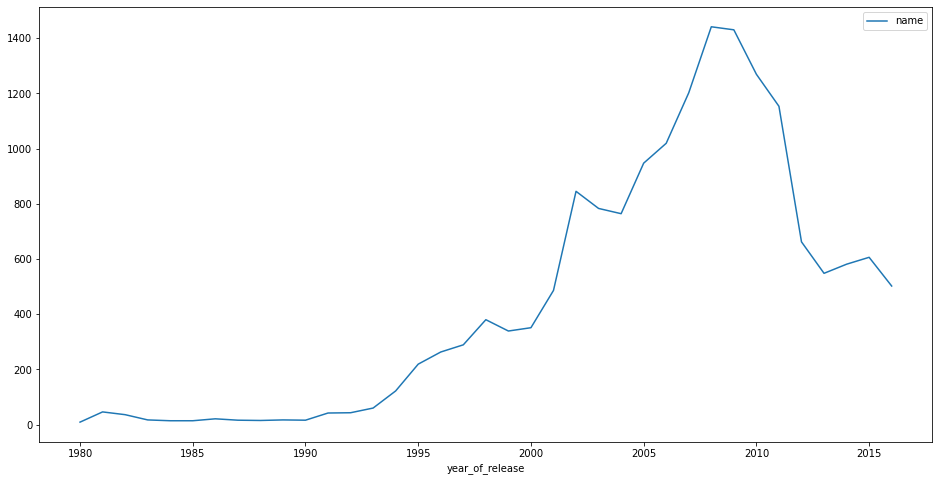

In [1400]:
data_by_year.plot(figsize=(16, 8))

Мы видим, что в начале 90-х начинается рост количества игр. Скорее всего, это связано с развитием компьютеров и игровых приставок. Даже можно увидеть резкий рост между 2001 и 2002, причиной этого мог стать выход Xbox в ноябре 2001.
Но уже с 2008 года мы видим резкое убывание. Мы можем это связать с тем, что интернет становится популярным и доступным (в 2010 году 30% населения мира уже им пользовались), и пиратство в интернете никак не регулируется еще.
Данными до 1995 года можно принебречь, так как игр выпускалось мало.

Посмотрим, как менялись продажи по платформам.

<AxesSubplot:xlabel='platform'>

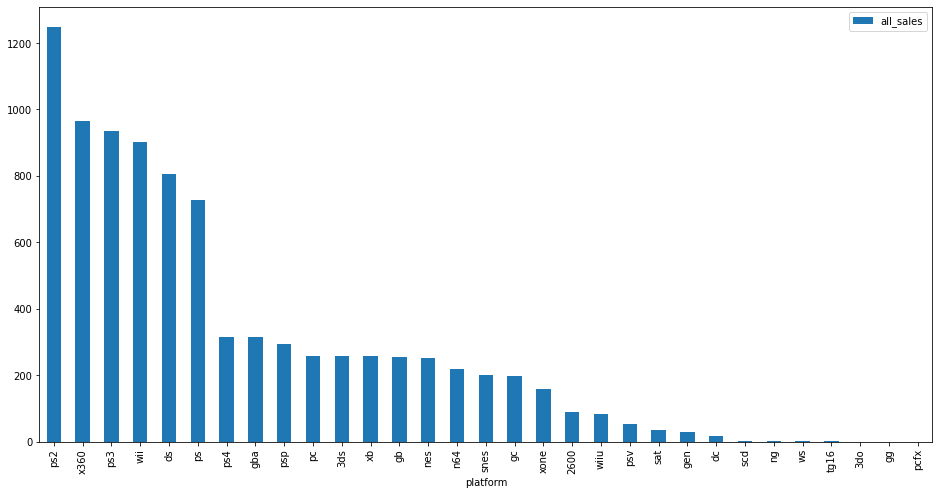

In [1401]:
(
    data.groupby('platform')
        .agg({'all_sales': 'sum'})
        .sort_values(by='all_sales', ascending=False)
        .plot(kind='bar', figsize=(16, 8))
)

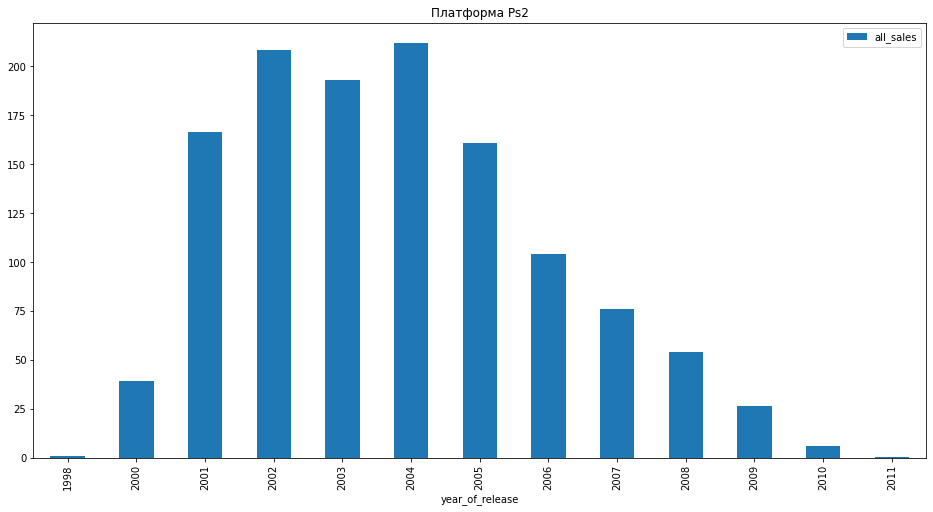

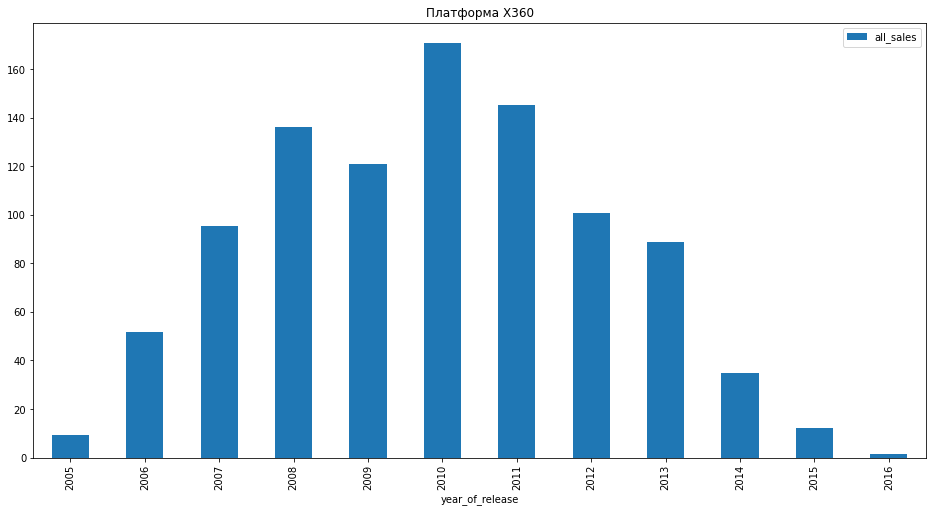

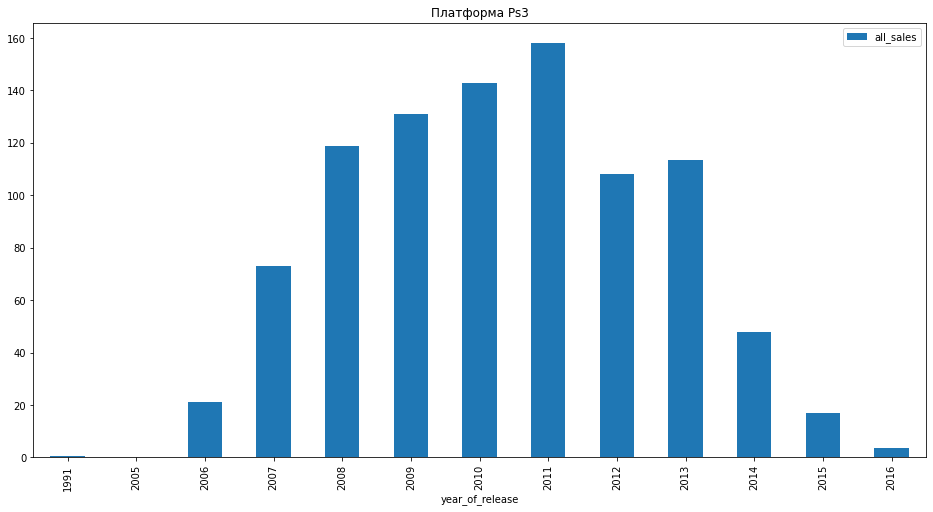

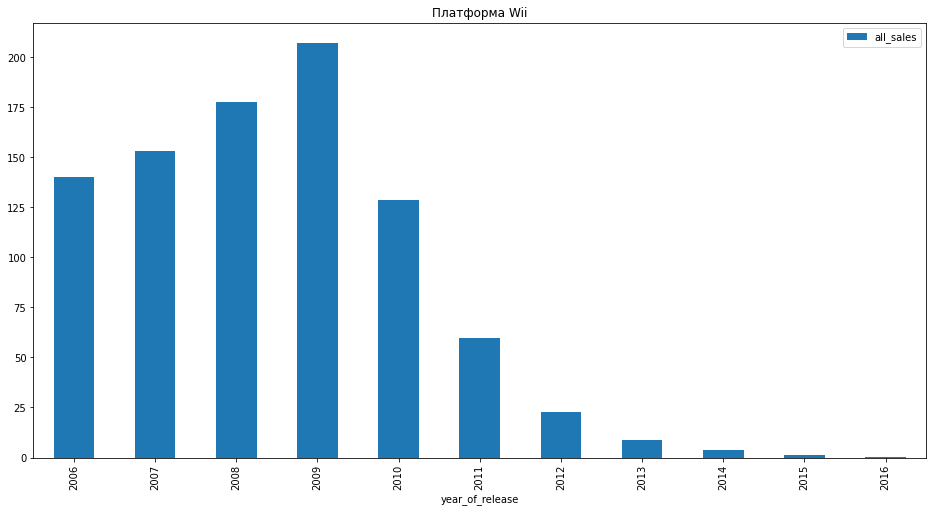

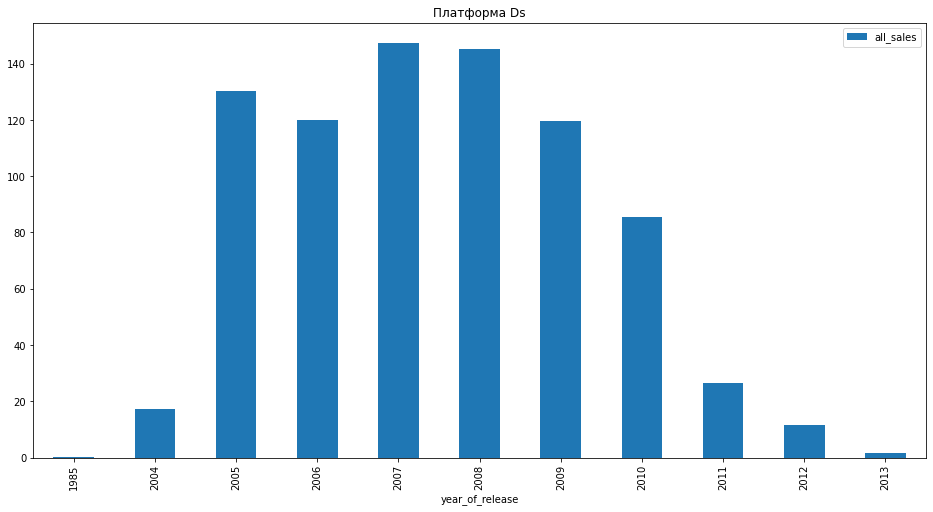

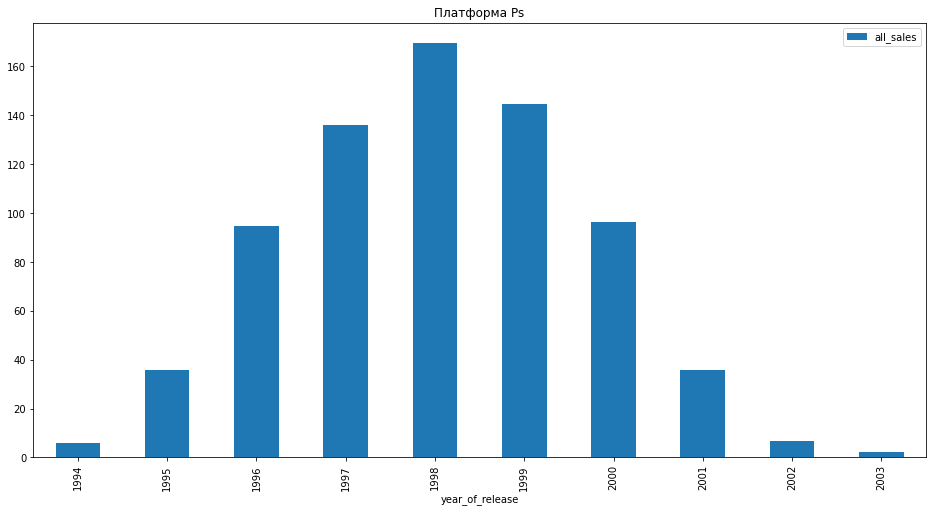

In [1402]:
biggest_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

for platform in biggest_platforms:
    data[data['platform'] == platform].groupby('year_of_release').agg({'all_sales': 'sum'}).plot(kind='bar', figsize=(16, 8), title=f'Платформа {platform.capitalize()}')

Определим границу присутствия платформы на рынке объемом продаж 40 миллионов. Тогда Ps2 существовала на рынке 8 лет, X360 - 8 лет, PS3 - 8 лет, Wii - 6 лет, Ds - 6 лет, Ps - 5 лет. В среднем платформа существует на рынке 7 лет.

Видно, что на пик своей популярности каждая платформа выходит плавно примерно через 3-4 года на рынке. И так же постепенно уменьшаются количества продаж после пика. Мы можем это связать с выпуском новых более прогрессивных платформ, а также с постепенным угасанием игрового рынка.

Так как цель нашего проекта спрогнозировать продажи в 2017 году, стоит взять только актуальный период, который поможет в работе. Как мы уже определили, платформа в среднем живет 7 лет, так что мы возьмем данные с 2009 по 2016 год.

In [1403]:
data = data[data['year_of_release'] >= 2009]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82
15,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80.0,74.0,E,21.80
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05


Обрезав данные только по актуальному периоду, мы можем еще раз посмотреть, какие платформы лидируют по продажам.

<AxesSubplot:xlabel='platform'>

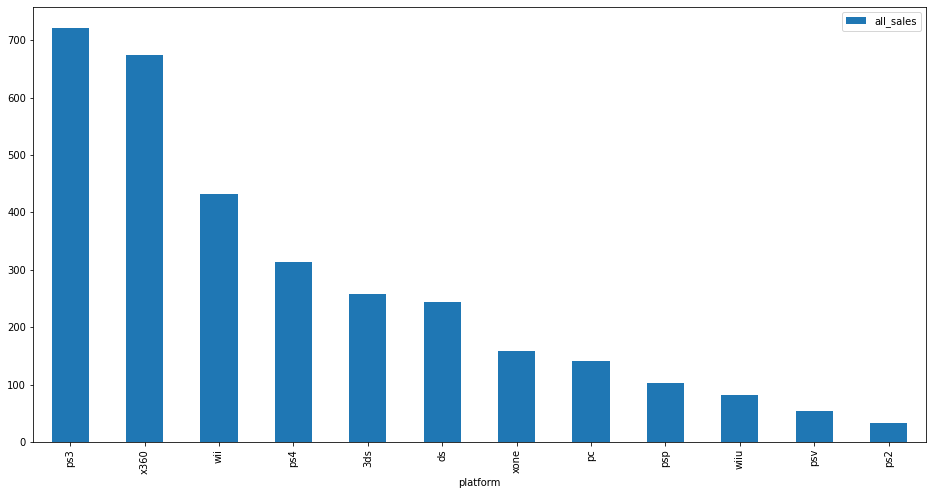

In [1404]:
(
    data.groupby('platform')
        .agg({'all_sales': 'sum'})
        .sort_values(by='all_sales', ascending=False)
        .plot(kind='bar', figsize=(16, 8))
)

На рынке до сих пор лидируют такие платформы, как *Ps3*, *X360*, *Wii*, *Ds*. Но давайте посмотрим, какие платформы растут, а какие падают.

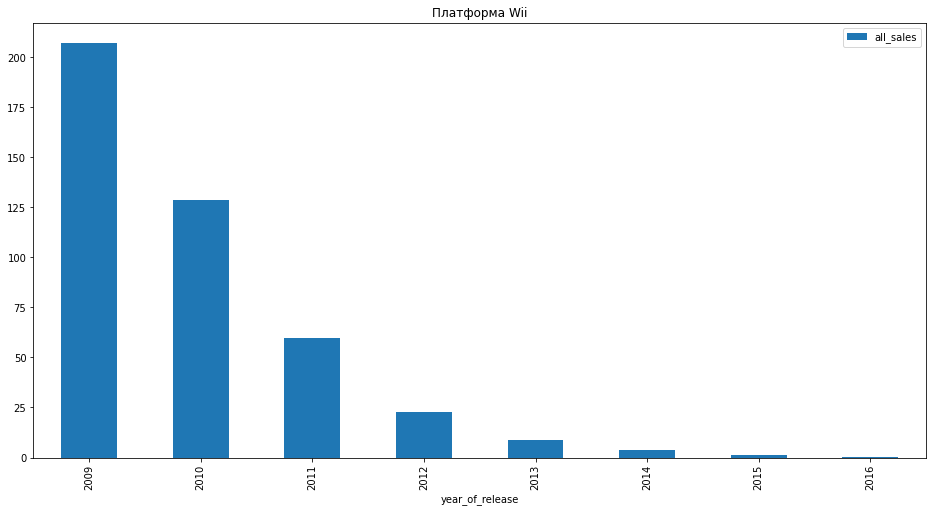

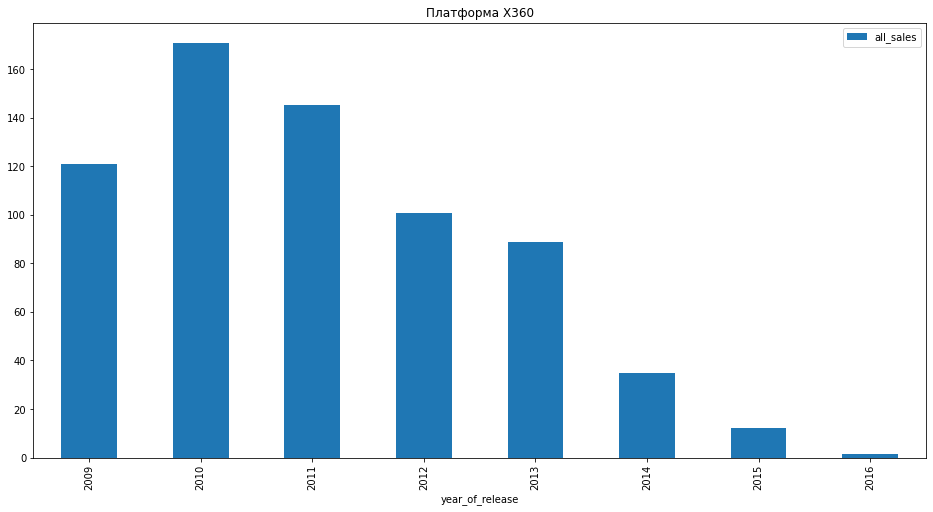

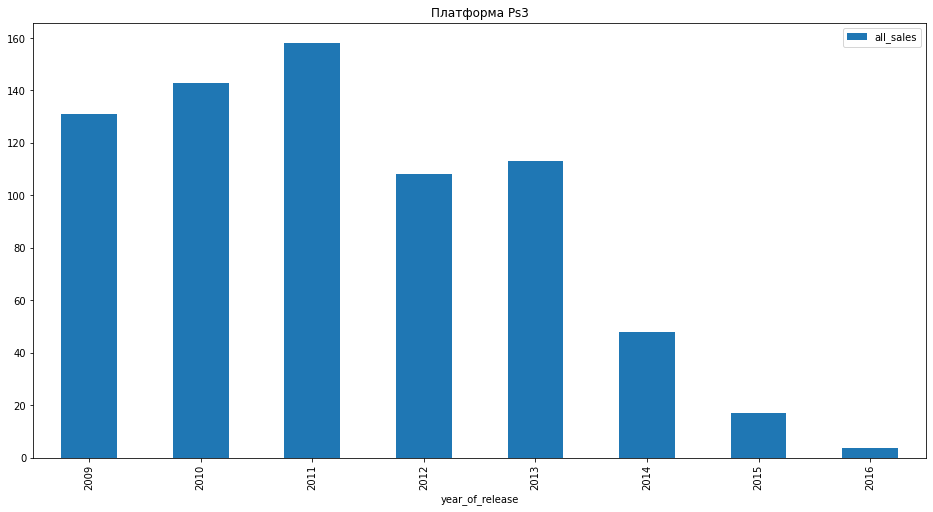

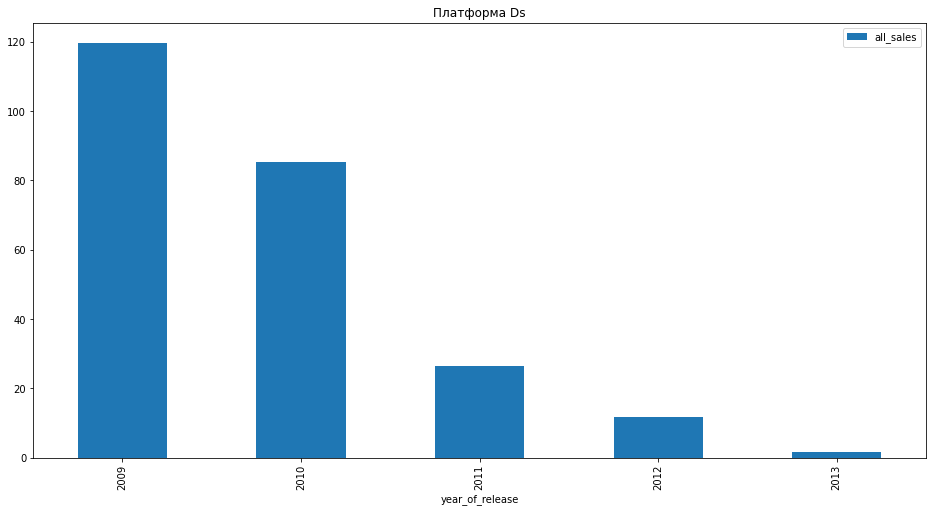

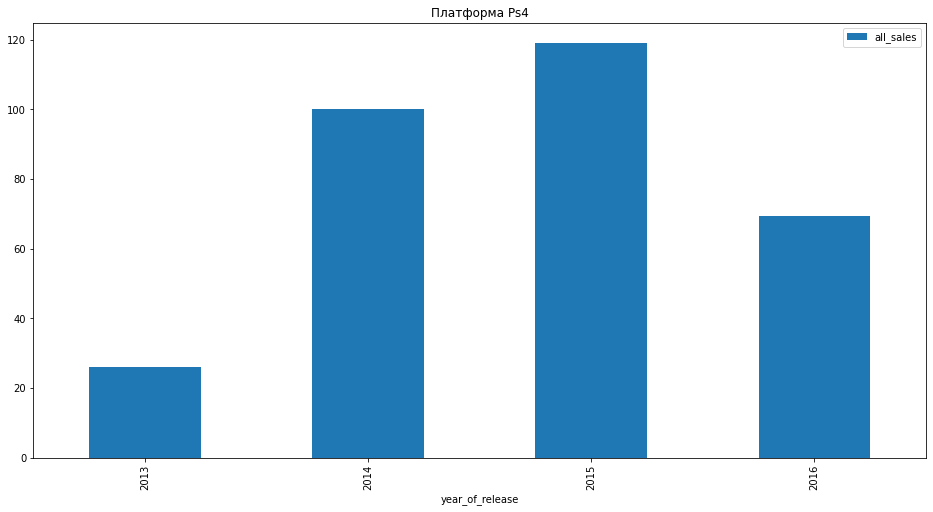

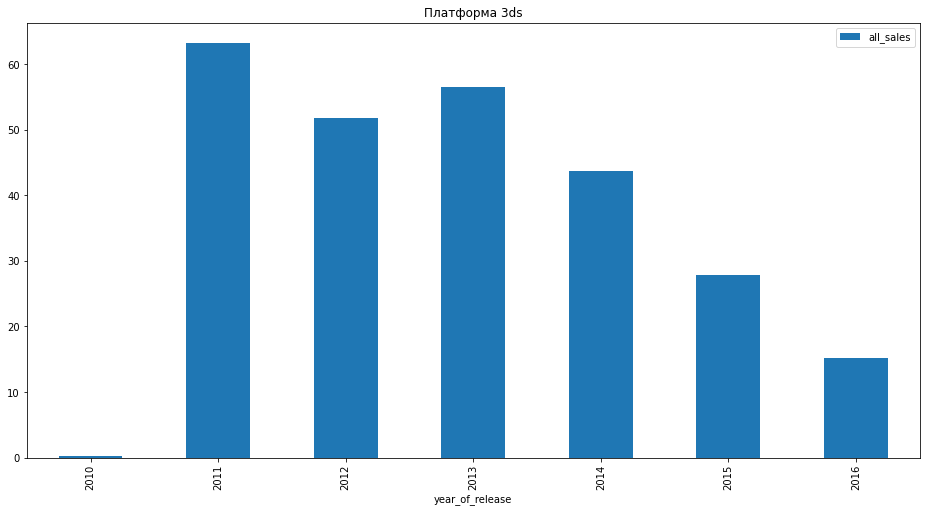

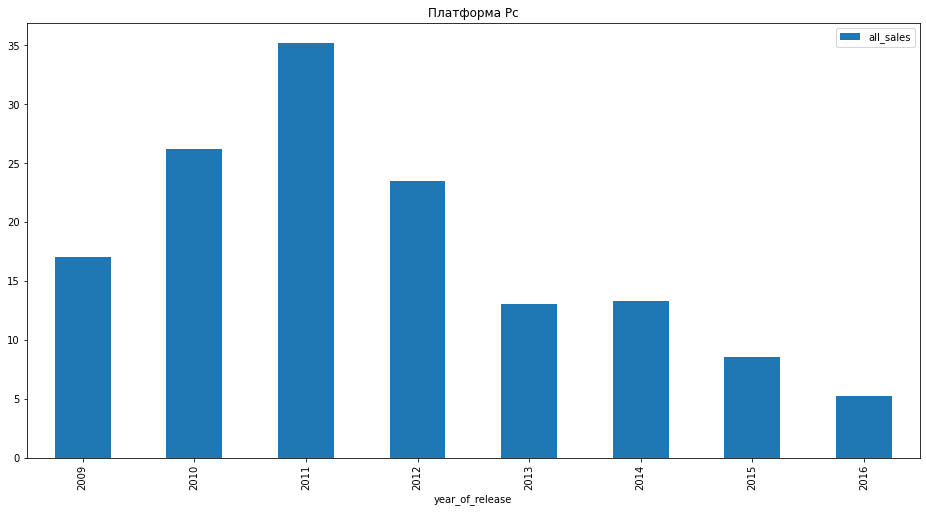

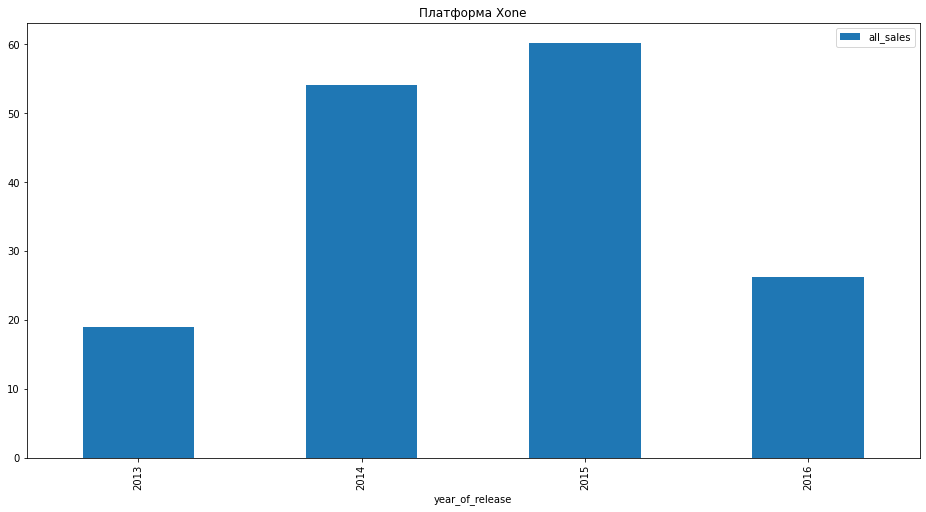

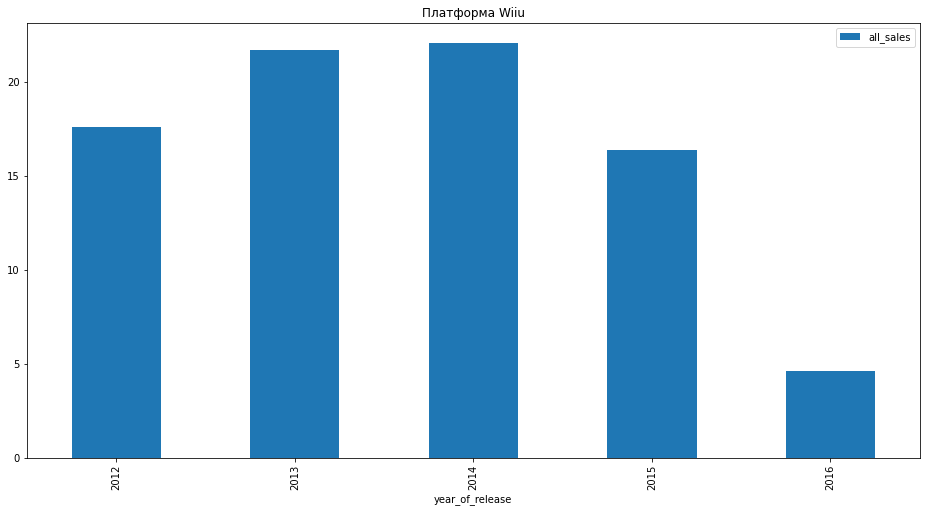

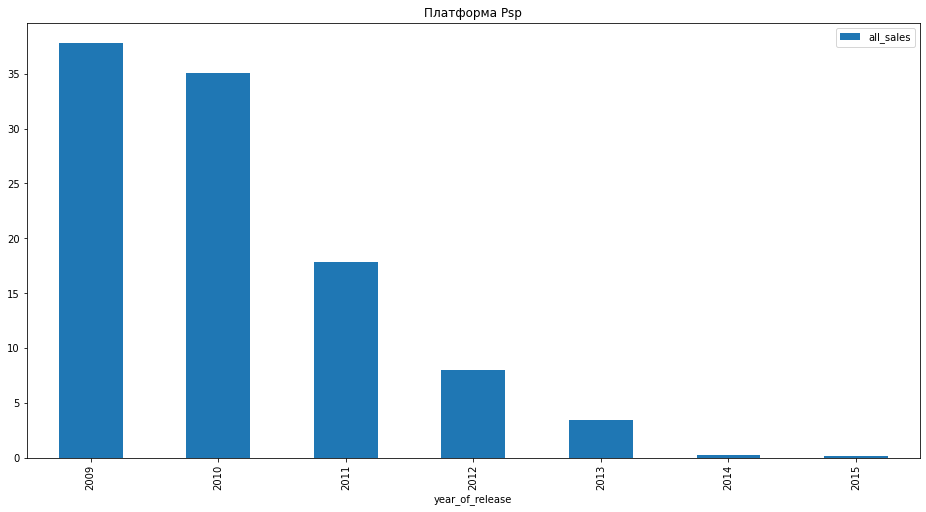

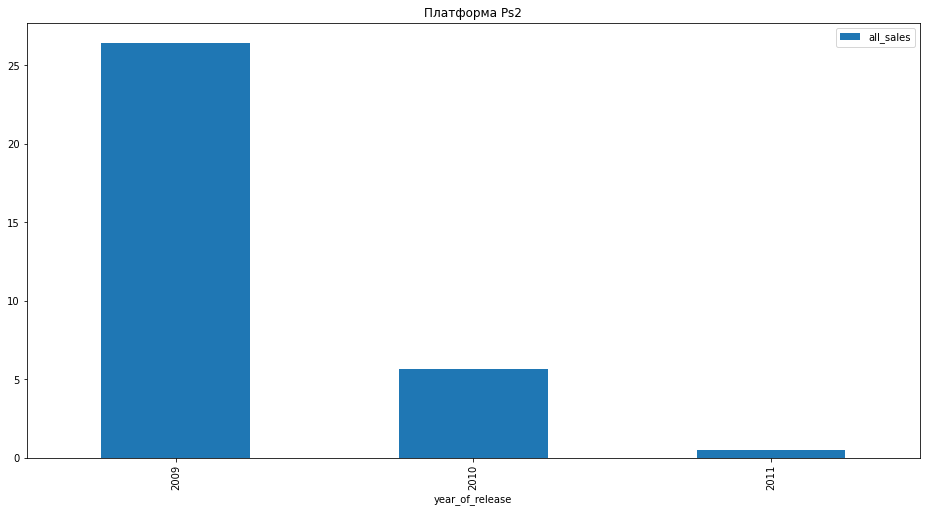

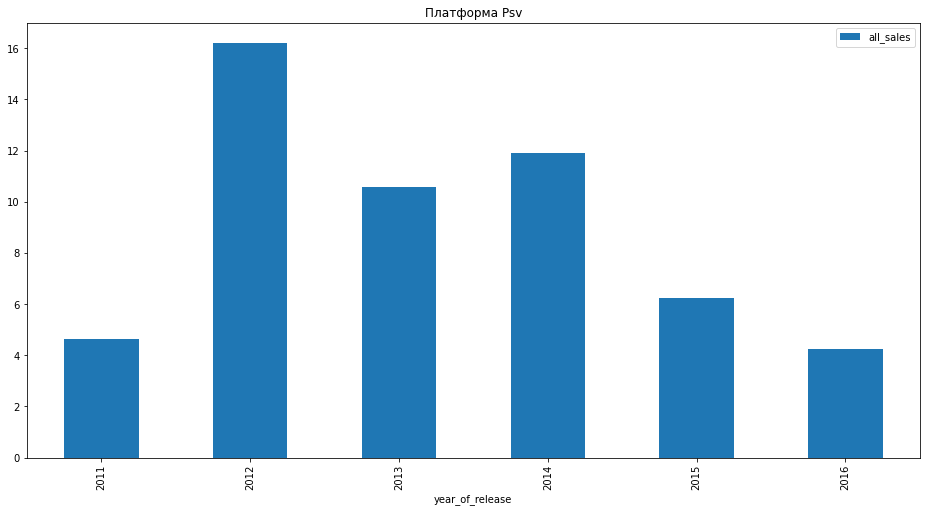

In [1405]:
for platform in data['platform'].unique():
    data[data['platform'] == platform].groupby('year_of_release').agg({'all_sales': 'sum'}).plot(kind='bar', figsize=(16, 8), title=f'Платформа {platform.capitalize()}')

Хотя такие платформы как *Wii*, *X3360*, *Ps3*, *Ds* лидеры продаж за 2009-2016 период, но по диаграмме видно, что они уже перестали или перестают существовать и являются неперспективными.

К потенциально прибыльным мы можем отнести - *Ps4*, *Pc*, *Wiiu*, *Xone*, и хотя за 2016 год эти компании демонстрируют провал в продажах, мы помним, что за этот год в таблице у нас не полные данные.

(0.0, 2.0)

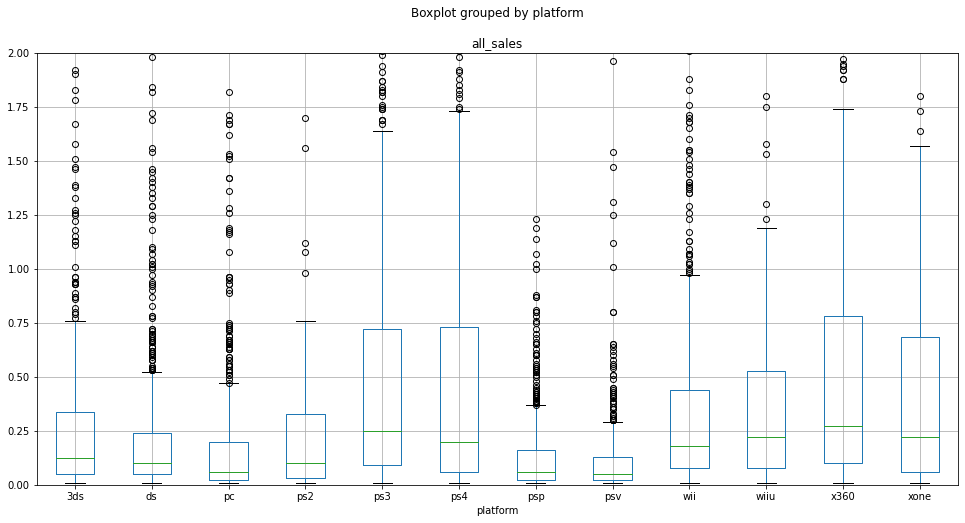

In [1406]:
import matplotlib.pyplot as plt

data.boxplot(by='platform', column='all_sales', figsize=(16, 8))
plt.ylim(0, 2)

Из диаграммы размаха видно, что
- для большинства платформ 50% игр имеют плохие продажи (`3ds`, `ds`, `pc`, `ps2`, `psp`, `psv`)
- на рынке есть гиганты, такие как `ps3`, `ps4`, `x360` и `xone`, их игры продаются хорошо в среднем, хотя 50% игр имеет количество продаж до четверти миллиона
- во всех платформах случаются выбросы – это игры, которые имеют большие продажи, но они единичны в своем роде

Для того чтобы строить близкий к реальности прогноз на 2017 год, нам следует избавиться от выбросов:

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

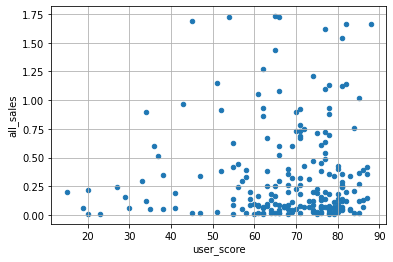

Корреляция между all_sales и user_score для платформы PS4 очень слабая: 0.1




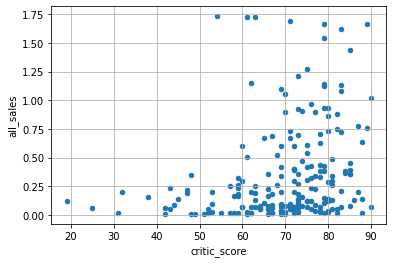

Корреляция между all_sales и critic_score для платформы PS4 слабая: 0.33




In [1408]:
def corr_category(corr):
    abs_corr = abs(corr)
    if abs_corr < 0.2:
        return 'очень слабая'
    elif abs_corr < 0.5:
        return 'слабая'
    elif abs_corr < 0.7:
        return 'средняя'
    elif abs_corr < 0.9:
        return 'высокая'
    return 'очень высокая'

cols = ['user_score', 'critic_score']
ps4_data = data[data['platform'] == 'ps4']
for col in cols:
    ps4_data.plot(x=col, y='all_sales', kind='scatter', grid=True)
    plt.show()
    corr = round((data['all_sales'].corr(data[col])), 2)
    print(f"Корреляция между all_sales и {col} для платформы PS4 {corr_category(corr)}: {corr}")
    print('\n')

Связи между оценками и продажами практически нет.
Посмотрим на корреляцию между `user_score` и `all_sales`, а также между `critic_score` и `all_sales` на других платформах.

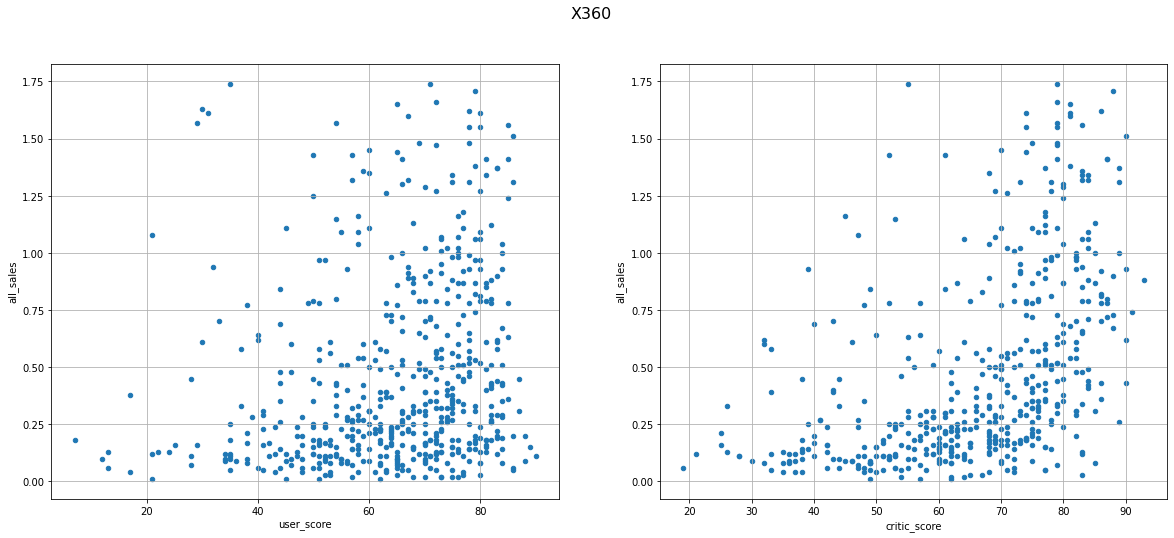

Корреляция между отзывами критиков и продажами для платформы X360 слабая: 0.48
Корреляция между отзывами пользователей и продажами для платформы X360 слабая: 0.2




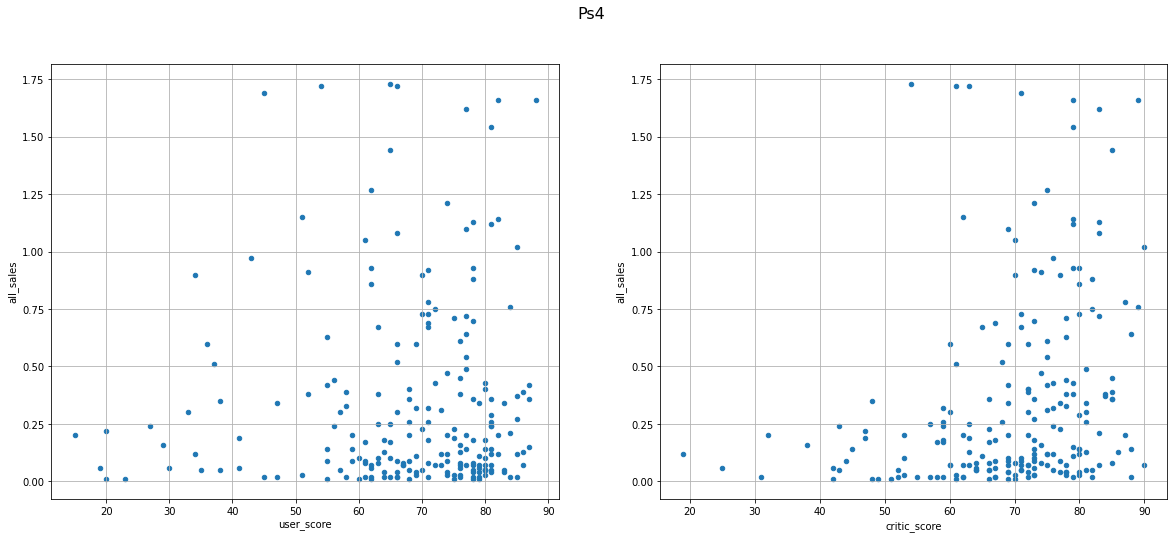

Корреляция между отзывами критиков и продажами для платформы Ps4 слабая: 0.26
Корреляция между отзывами пользователей и продажами для платформы Ps4 очень слабая: 0.03




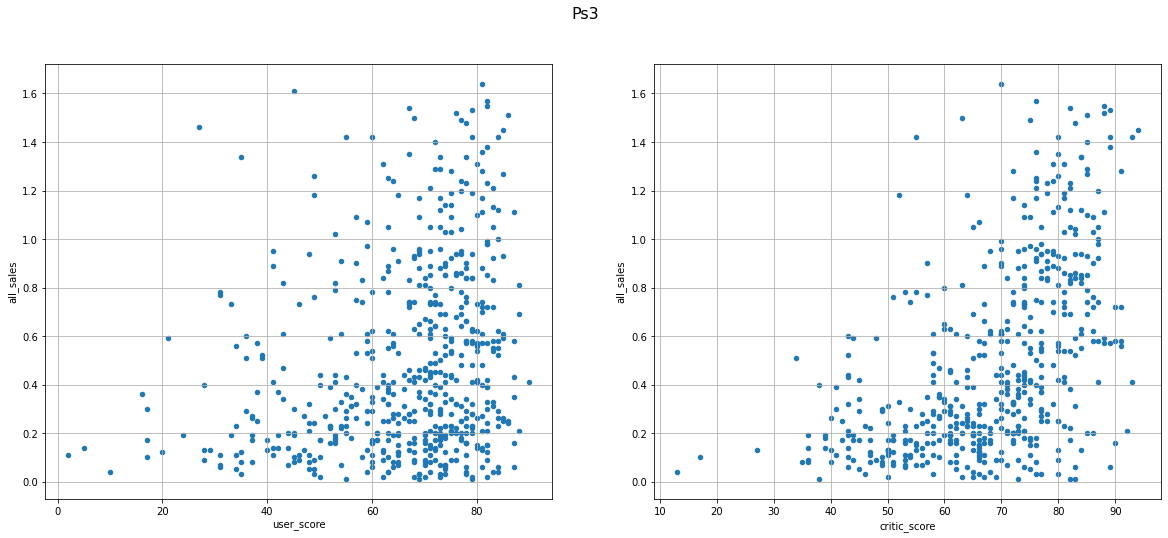

Корреляция между отзывами критиков и продажами для платформы Ps3 средняя: 0.52
Корреляция между отзывами пользователей и продажами для платформы Ps3 слабая: 0.23




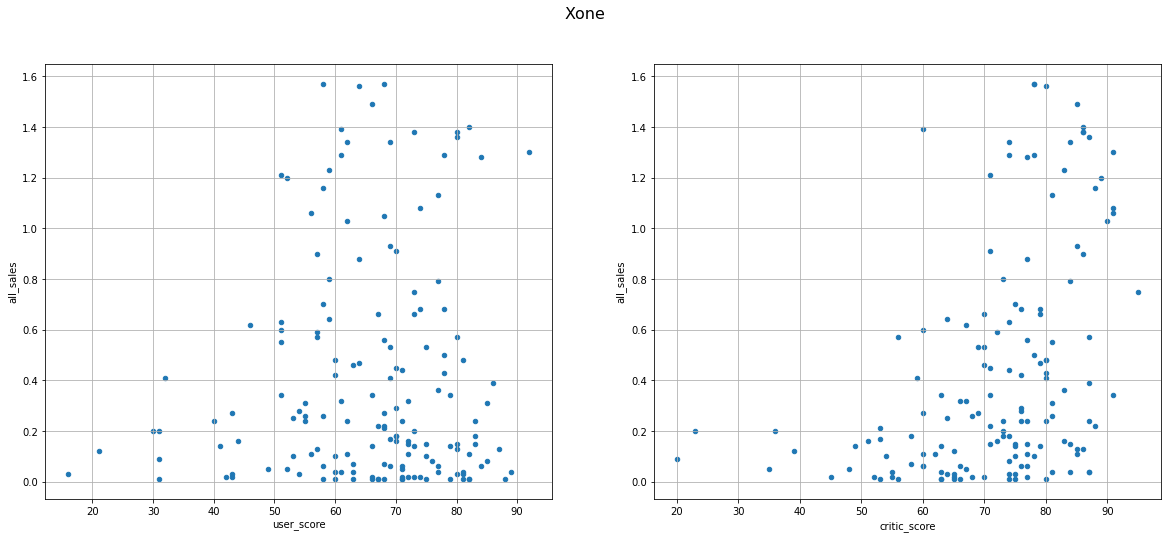

Корреляция между отзывами критиков и продажами для платформы Xone слабая: 0.42
Корреляция между отзывами пользователей и продажами для платформы Xone очень слабая: 0.06




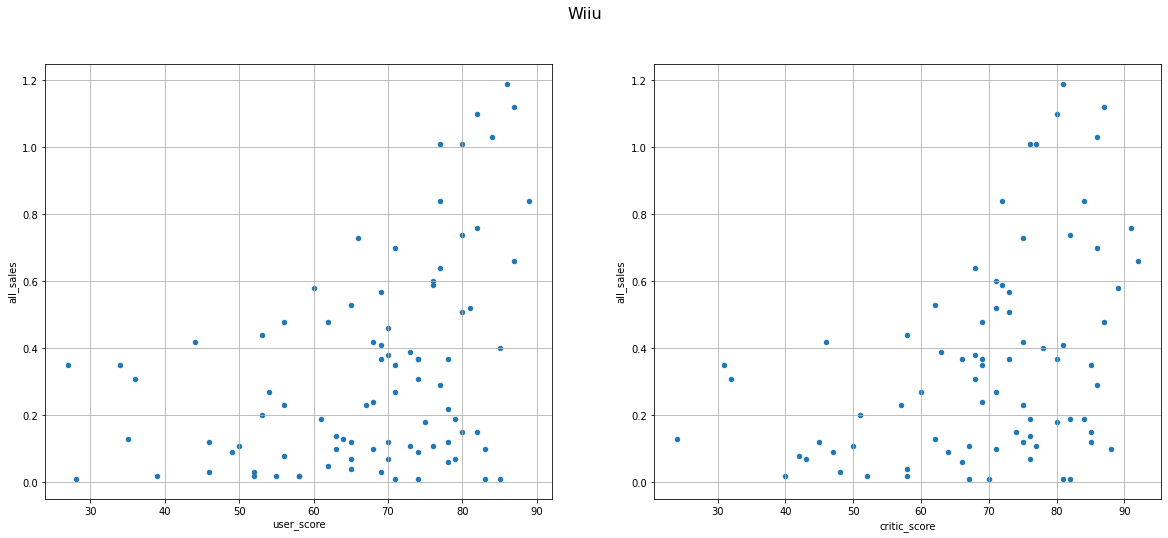

Корреляция между отзывами критиков и продажами для платформы Wiiu слабая: 0.4
Корреляция между отзывами пользователей и продажами для платформы Wiiu слабая: 0.4




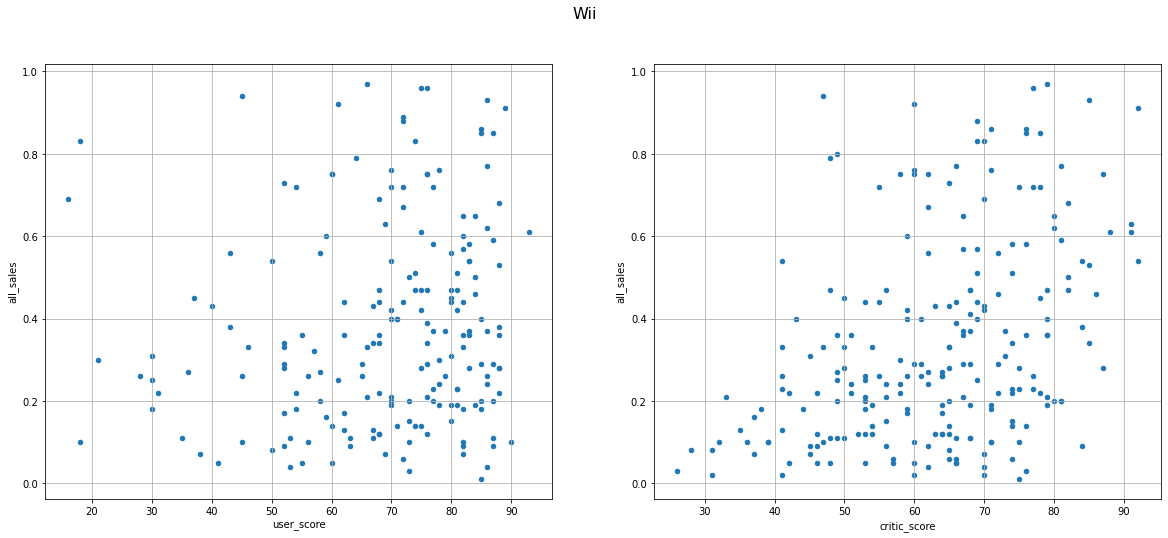

Корреляция между отзывами критиков и продажами для платформы Wii слабая: 0.39
Корреляция между отзывами пользователей и продажами для платформы Wii очень слабая: 0.12




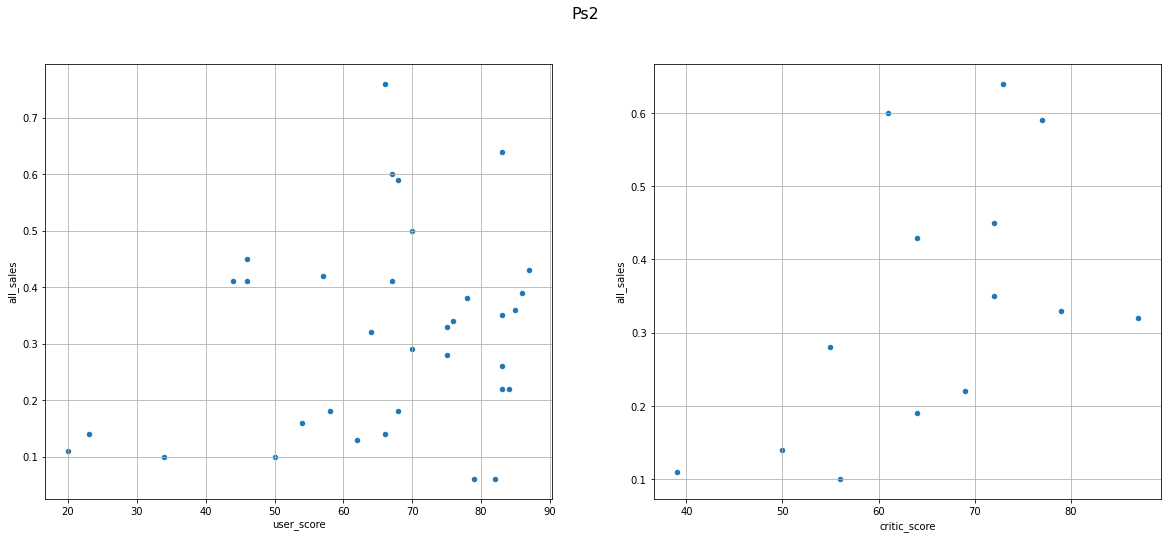

Корреляция между отзывами критиков и продажами для платформы Ps2 средняя: 0.53
Корреляция между отзывами пользователей и продажами для платформы Ps2 слабая: 0.24




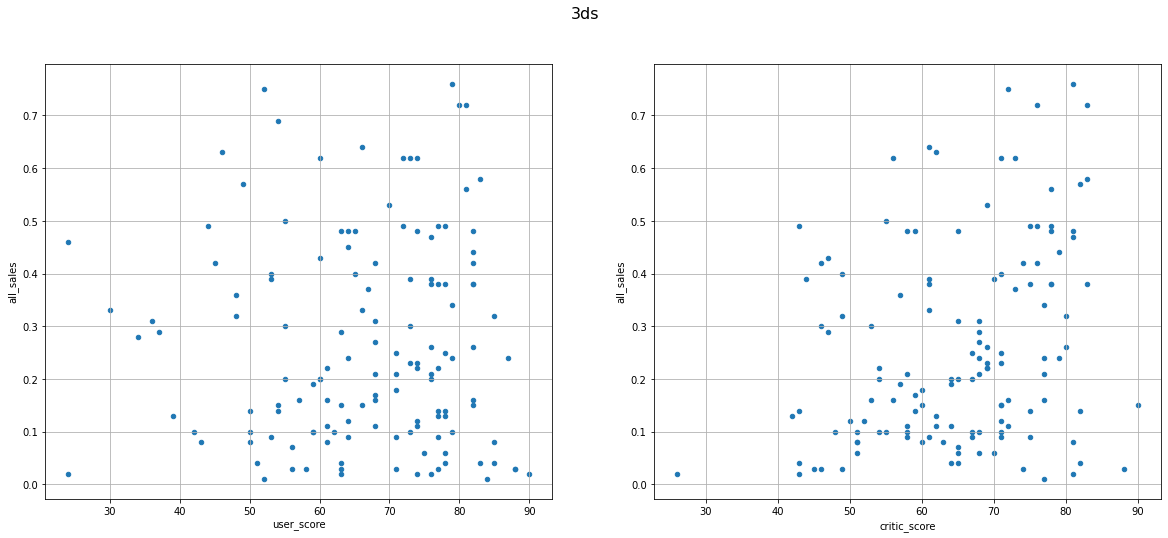

Корреляция между отзывами критиков и продажами для платформы 3ds слабая: 0.26
Корреляция между отзывами пользователей и продажами для платформы 3ds очень слабая: -0.0




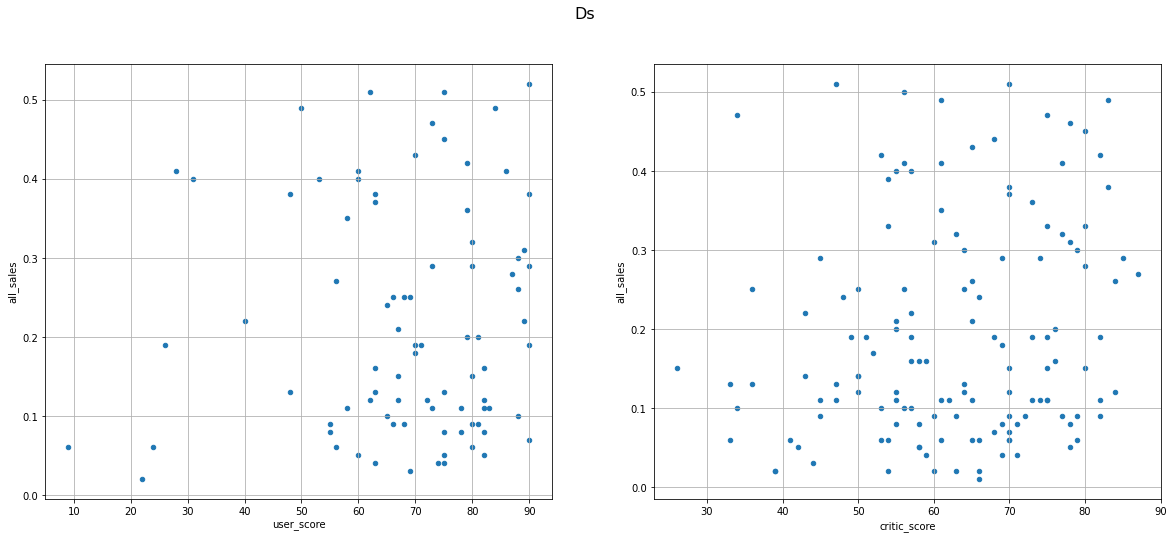

Корреляция между отзывами критиков и продажами для платформы Ds очень слабая: 0.17
Корреляция между отзывами пользователей и продажами для платформы Ds очень слабая: 0.06




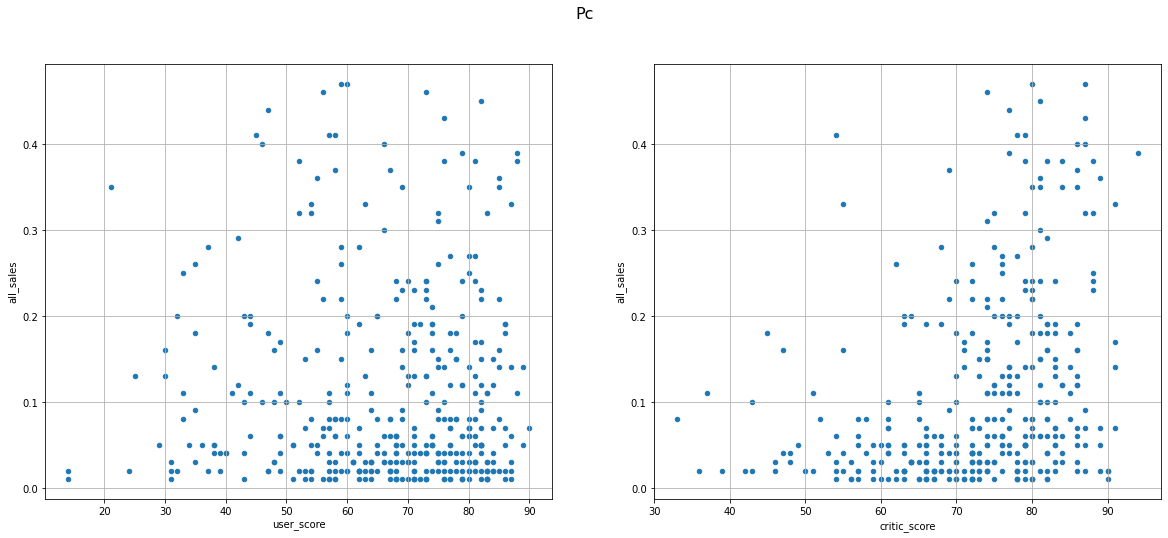

Корреляция между отзывами критиков и продажами для платформы Pc слабая: 0.33
Корреляция между отзывами пользователей и продажами для платформы Pc очень слабая: -0.01




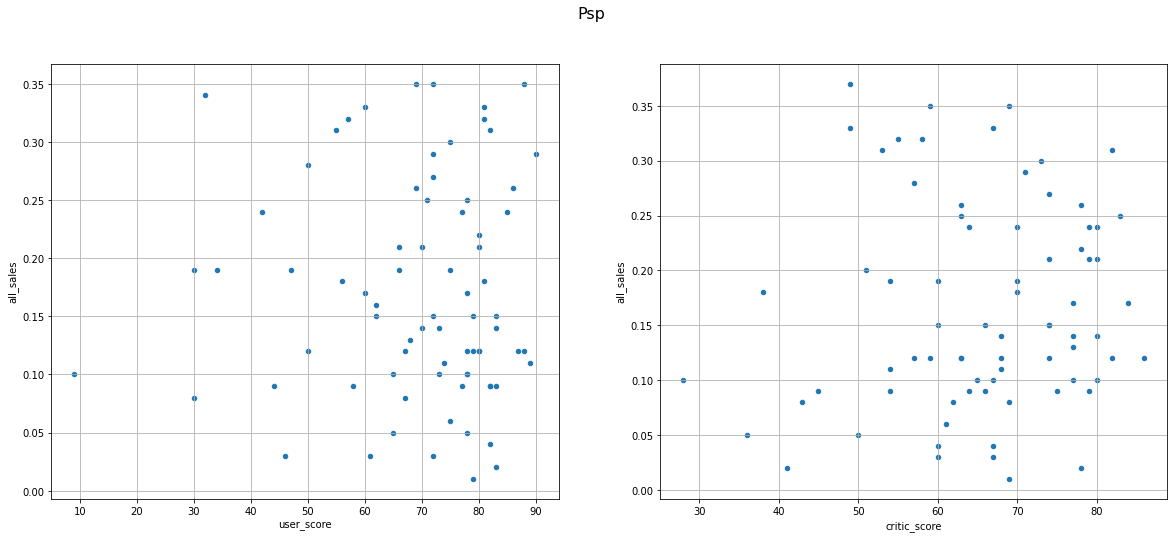

Корреляция между отзывами критиков и продажами для платформы Psp очень слабая: 0.09
Корреляция между отзывами пользователей и продажами для платформы Psp очень слабая: -0.01




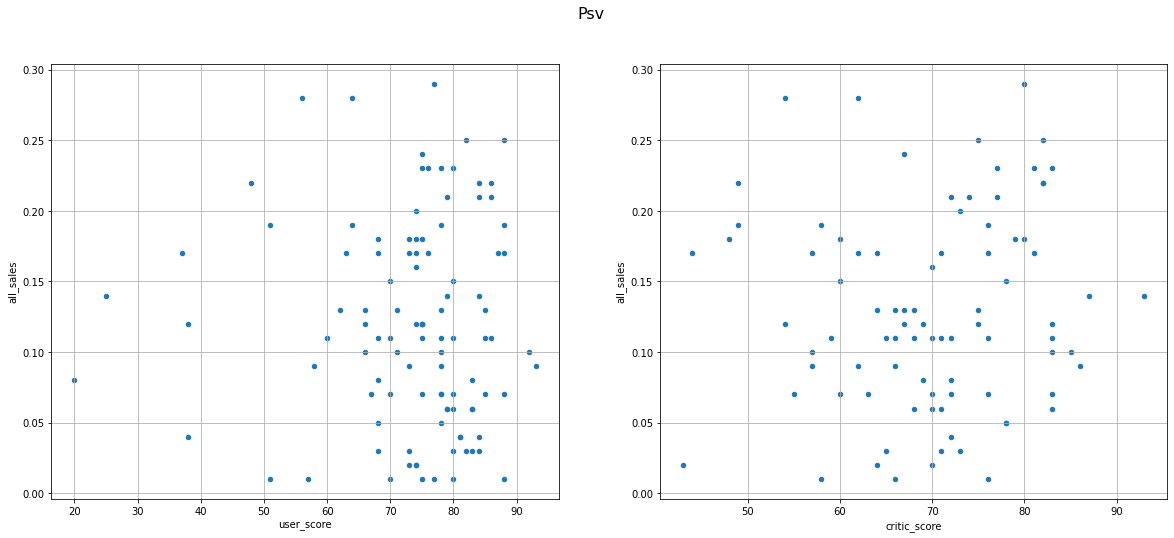

Корреляция между отзывами критиков и продажами для платформы Psv очень слабая: 0.07
Корреляция между отзывами пользователей и продажами для платформы Psv очень слабая: -0.02




In [1409]:
for platform in data['platform'].unique():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

    platform_data = data[data['platform'] == platform]

    platform_data.plot(x='user_score', y='all_sales', kind='scatter', grid=True, ax=ax1)
    platform_data.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, ax=ax2)
    fig.suptitle(platform.capitalize(), fontsize=16)
    plt.show()

    user_sales_corr = round(platform_data['all_sales'].corr(platform_data['user_score']), 2)
    critic_sales_corr = round(platform_data['all_sales'].corr(platform_data['critic_score']), 2)

    print(f"Корреляция между отзывами критиков и продажами для платформы {platform.capitalize()} {corr_category(critic_sales_corr)}: {critic_sales_corr}")
    print(f"Корреляция между отзывами пользователей и продажами для платформы {platform.capitalize()} {corr_category(user_sales_corr)}: {user_sales_corr}")
    print('\n')